# Ensemble Learning and Random Forest

Tingting Yang

INDE 577 - Data Science and Machine Learning

In this notebook, we will use ensemble learning to classify the two labels from an artificial dataset. 
* Random Forest

* Multilayer Perceptron, Logistic Regrssion, and Random Forest algorithms will be combined together, and the hard voting classifier will be used to select the final prediction. 

* Multiple decision trees will be constructed using bagging strategy. 

#### Dataset

We use the an artificial data, [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset from [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) to make two interleaving half circles.

#### Goal

Use the three ensemble learning algorithms to classify the two labels from make_moons dataset.


#### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier), [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=votingclassifier#sklearn.ensemble.VotingClassifier), and [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier) in [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) in [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier) in [sklearn.neural_network](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score) in [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The artificial data, [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset, is loaded from [sklearn.dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets).

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt 
import numpy as np

# Import the tools from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons

---

### Data Exploration and Data Wrangling

After importing the dataset, we simply plot the scatter plot to have an overall impression of the data distribution.

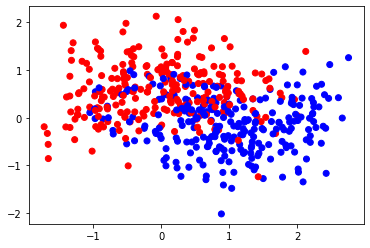

In [2]:
# Scatter plot for the dataset
X, y = make_moons(n_samples= 500, noise = .50, random_state=0)
colors = ["blue" if label == 1 else "red" for label in y]
plt.scatter(X[:, 0], X[:, 1], c = colors)

### Train and Test Data Split

In [3]:
# Use the train_test_split function in sklearn package
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

---

### Random Forest

We use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) in [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) to implement the random forest.

In [4]:
# Train the training set
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [5]:
# Output the mean accuracy on the given test data and labels
clf.score(X_test, y_test)

0.768

The mean accuracy of the random forest on the testing set is 0.768, which is just OK. 

What if we combine the random forest with other two different models to predict?

---

### Ensemble learning 1

In this part, Multilayer Perceptron, Logistic Regrssion, and Random Forest algorithms will be combined together, and the hard voting classifier will be used to select the final prediction. We will compare the performances of the three individual models and the ensemble model.

We directly use the classifier provided by sklearn, [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

To use hard voting classifier, We directly use the tool [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) provided by [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) and set voting = 'hard'.

In [6]:
# Set up ensemble learners with hard voting classifier
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

In [7]:
# Train the training set
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

Let's chech the accuracy of the three individual models and the ensemble model. The [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score) tool can help with this task.

In [8]:
# Fit 3 models and the ensemble model, and print the accuracy
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')    

LogisticRegression, accuracy score = 0.832
MLPClassifier, accuracy score = 0.8
RandomForestClassifier, accuracy score = 0.776
VotingClassifier, accuracy score = 0.816


The ensemble model with hard voting classifier has a slightly higher accuracy than the multilayer preceptron nodel and the random forest model. 

---

### Ensemble learning 2

In this part, multiple decision trees will be constructed using bagging strategy. 

To achieve, we use the tools, [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier) and [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in sklearn. 

In [9]:
# Set up the ensemble model
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [10]:
# Train the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [11]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.808

Let's compare it with the individual decision tree model!

In [12]:
# Set up the decision tree and train the training set
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
# Predict the test data and calculate the accuracy
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.736


The accuracy of the ensemble model with bagging is higher than the individual decision tree model, suggesting that the ensemble model with bagging works better than the individual decision tree model.

Recall the results from random forest, the accuracy is 0.768, which is also higher than the accuracy of the individual decision tree. 